In [88]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [89]:
image_directory = '/home/laubravo/Documents/cariotipos/MFISH_split_binaries/train/train2018/'
annotation_file = '/home/laubravo/Documents/cariotipos/MFISH_split_binaries/train/annotations/MFISH_chromosomes_train2018.json'

In [90]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [91]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
c01 c02 c03 c04 c05 c06 c07 c08 c09 c10 c11 c12 c13 c14 c15 c16 c17 c18 c19 c20 c21 c22 c23 c24

Custom COCO supercategories: 
chromosome


In [98]:
print(example_coco)
category_ids = example_coco.getCatIds(catNms=['c02'])
image_ids = example_coco.getImgIds(catIds=category_ids)
print(image_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

[1, 2, 3, 4, 5]


In [99]:
image_data

{'coco_url': '',
 'date_captured': '2018-06-26 14:50:53.139419',
 'file_name': 'A0102.png',
 'flickr_url': '',
 'height': 517,
 'id': 5,
 'license': 1,
 'width': 645}

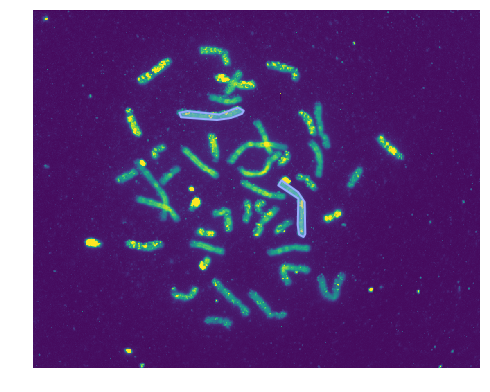

In [100]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)